In [8]:
%matplotlib inline
%run functions.ipynb

import pandas as pd
import numpy as np

# Batch analytical data 

In [9]:
# Save and load other analytical data as dataframe, but in this file we do not have measurements on R9-12 and R19-R24
other_compounds = 'analytical_data/20180814_SER_C0016_S&OA.XLS'
other_compounds = pd.ExcelFile(other_compounds)
other_compounds = other_compounds.parse('SampleConcentrations')

# Save and load serine from R1-R12 
serine_R1_to_R12 = 'analytical_data/C016_R1-R12_Serine.xlsx'
serine_R1_to_R12 = pd.ExcelFile(serine_R1_to_R12)
serine_R1_to_R12 = serine_R1_to_R12.parse('C016_R1-R12')

## The raw data was an excel sheet with data from all experiments unorganised in 1 sheet

## The following code organizes it into 1 excel file with 1 sheet for every reactor and has the sample time in order

In [10]:
# Convert the two rows into series so we can join them together in order to get a header name with compoundname and concentration
compound_name = other_compounds[2:3].squeeze()
concentration = other_compounds[0:1].squeeze()

header = compound_name.str.cat(concentration, sep = ', ')
header = pd.DataFrame(header)

# First transpose header row, then add header row into other compounds data. 
# This row is then put to be the actual header of the data frame.
# Then names for the 2 first columns are added
header = header.T 
other_compounds = other_compounds.append(header, ignore_index=True)
other_compounds.columns = other_compounds.iloc[-1] # puts new row as a header
other_compounds.columns.values[1] = 'Reactor_sample'
other_compounds.columns.values[2] = 'DilF'

# Drop the first 6 rows and delete column with nan as a header, also delete last to rows
other_compounds.drop(other_compounds.index[0:6], inplace = True)
other_compounds = other_compounds.loc[:, other_compounds.columns.notnull()] # this saves the columns that are not names nan
other_compounds = other_compounds.drop(other_compounds.tail(2).index, inplace = False)

# Now we can split the data into different data frames depending on the reactor number
R1_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R1_')]
R2_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R2_')]
R3_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R3_')]
R4_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R4_')]
R5_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R5_')]
R6_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R6_')]
R7_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R7_')]
R8_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R8_')]

### Add biomass and time to the data 

In [11]:
OD_R = 'OD_values.xlsx'
R1_compounds = add_biomass_time(OD_R, R1_compounds, 1)
R2_compounds = add_biomass_time(OD_R, R2_compounds, 2)
R3_compounds = add_biomass_time(OD_R, R3_compounds, 3)
R4_compounds = add_biomass_time(OD_R, R4_compounds, 4)
R5_compounds = add_biomass_time(OD_R, R5_compounds, 5)
R6_compounds = add_biomass_time(OD_R, R6_compounds, 6)
R7_compounds = add_biomass_time(OD_R, R7_compounds, 7)
R8_compounds = add_biomass_time(OD_R, R8_compounds, 8)

In [12]:
# Make an excel file for further use
writer = pd.ExcelWriter('analytical_data/modified_analytical_data/compounds_batch.xlsx')

R1_compounds.to_excel(writer,'R1_compounds')
R2_compounds.to_excel(writer,'R2_compounds')
R3_compounds.to_excel(writer,'R3_compounds')
R4_compounds.to_excel(writer,'R4_compounds')
R5_compounds.to_excel(writer,'R5_compounds')
R6_compounds.to_excel(writer,'R6_compounds')
R7_compounds.to_excel(writer,'R7_compounds')
R8_compounds.to_excel(writer,'R8_compounds')

writer.save()

## Later I received the rest of the data 

In [13]:
# Save and load other analytical data on R9-12 and R19-R24
other_compounds_R9_R24 = 'analytical_data/C016_R9-12&R19-24_S&OA.xlsx'
other_compounds_R9_R24 = pd.ExcelFile(other_compounds_R9_R24)
other_compounds_R9_R24 = other_compounds_R9_R24.parse('SampleConcentrations')

# Convert the two rows into series so we can join them together
compound_name_R9_R24 = other_compounds_R9_R24[2:3].squeeze()
concentration = other_compounds_R9_R24[0:1].squeeze()

header = compound_name_R9_R24.str.cat(concentration, sep = ' ')
header = pd.DataFrame(header)

# First transpose header row, then add header row into other compounds data. 
# This row is then put to be the actual header of the data frame.
# Then names for the 2 first columns are added
header = header.T
other_compounds_R9_R24 = other_compounds_R9_R24.append(header, ignore_index=True)
other_compounds_R9_R24.columns = other_compounds_R9_R24.iloc[-1]
other_compounds_R9_R24.columns.values[1] = 'Reactor_sample'
other_compounds_R9_R24.columns.values[2] = 'DilF'

# Drop the first 3 rows and delete column with nan as a header, also delete last to rows
other_compounds_R9_R24.drop(other_compounds_R9_R24.index[0:3], inplace = True)
other_compounds_R9_R24 = other_compounds_R9_R24.loc[:, other_compounds_R9_R24.columns.notnull()]
other_compounds_R9_R24 = other_compounds_R9_R24.drop(other_compounds_R9_R24.tail(3).index, inplace = False)

# Now we can split the data into different data frames depending on the reactor number

R9_compounds = other_compounds_R9_R24[other_compounds_R9_R24['Reactor_sample'].str.contains('R9_')]
R10_compounds = other_compounds_R9_R24[other_compounds_R9_R24['Reactor_sample'].str.contains('R10_')]
R11_compounds = other_compounds_R9_R24[other_compounds_R9_R24['Reactor_sample'].str.contains('R11_')]
R12_compounds = other_compounds_R9_R24[other_compounds_R9_R24['Reactor_sample'].str.contains('R12_')]

### Add biomass and time to the data 

In [14]:
R9_compounds = add_biomass_time(OD_R, R9_compounds, 9)
R10_compounds = add_biomass_time(OD_R, R10_compounds, 10)
R11_compounds = add_biomass_time(OD_R, R11_compounds, 11)
R12_compounds = add_biomass_time(OD_R, R12_compounds, 12)

In [15]:
# Make an excel file for further use

writer = pd.ExcelWriter('analytical_data/modified_analytical_data/compounds_batch_R9toR12.xlsx')

R9_compounds.to_excel(writer,'R9_compounds')
R10_compounds.to_excel(writer,'R10_compounds')
R11_compounds.to_excel(writer,'R11_compounds')
R12_compounds.to_excel(writer,'R12_compounds')

writer.save()

# Fed batch analytical data

In [16]:
# Here the data for R19-R24
other_compounds = 'analytical_data/C016_R9-12&R19-24_S&OA.xlsx'
other_compounds = pd.ExcelFile(other_compounds)
other_compounds = other_compounds.parse('SampleConcentrations')

# Convert the two rows into series so we can join them together in order to get a header name with compoundname and concentration
compound_name = other_compounds[2:3].squeeze()
concentration = other_compounds[0:1].squeeze()

header = compound_name.str.cat(concentration, sep = ' ')
header = pd.DataFrame(header)

# First transpose header row, then add header row into other compounds data. 
# This row is then put to be the actual header of the data frame.
# Then names for the 2 first columns are added
header = header.T
other_compounds = other_compounds.append(header, ignore_index=True)
other_compounds.columns = other_compounds.iloc[-1]
other_compounds.columns.values[1] = 'Reactor_sample'
other_compounds.columns.values[2] = 'DilF'

# Drop the first 6 rows and delete column with nan as a header, also delete last to rows
other_compounds.drop(other_compounds.index[0:6], inplace = True)
other_compounds = other_compounds.loc[:, other_compounds.columns.notnull()] # this saves the columns that are not named nan
other_compounds = other_compounds.drop(other_compounds.tail(2).index, inplace = False)

# Collect the dataR22_compounds.reset_index(inplace=True, drop=True)
R23_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R23_')]
R23_compounds.reset_index(inplace=True, drop=True)
R24_compounds = other_compounds[other_compounds['Reactor_sample'].str.contains('R24_')]
R24_compounds.reset_index(inplace=True, drop=True)


In [17]:
# Generates the sample time
time_23 = sample_time_fedbatch(22, 37, 52)
time_24 = sample_time_fedbatch(22, 34, 17)

In [18]:
# Then add serine and OD values - and convert the OD to biomass. 
R23_compounds = add_time_bio_ser(R23_compounds, 23, time_23)
R24_compounds = add_time_bio_ser(R24_compounds, 24, time_24)

In [19]:
writer = pd.ExcelWriter('analytical_data/modified_analytical_data/compounds_fedbatch_ser.xlsx')

R23_compounds.to_excel(writer,'R23_compounds')
R24_compounds.to_excel(writer,'R24_compounds')

writer.save()

## Plots of biomass, serine and glucose 

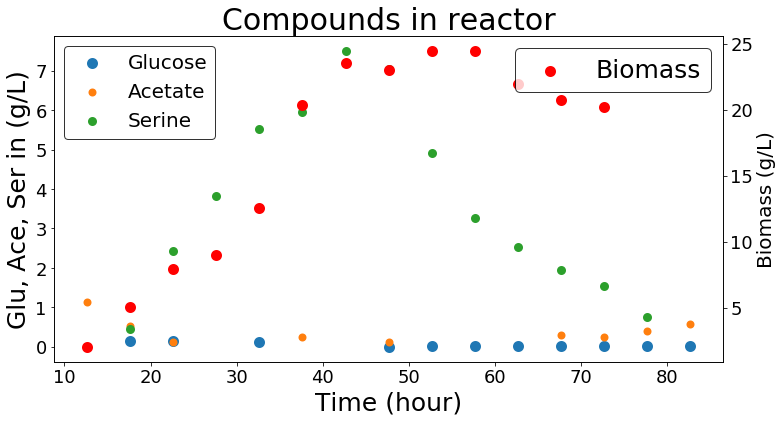

In [20]:
R23_compounds = R23_compounds.replace(['n.a.'],[np.nan])
plot_compounds_micro_fed(R23_compounds, 23)

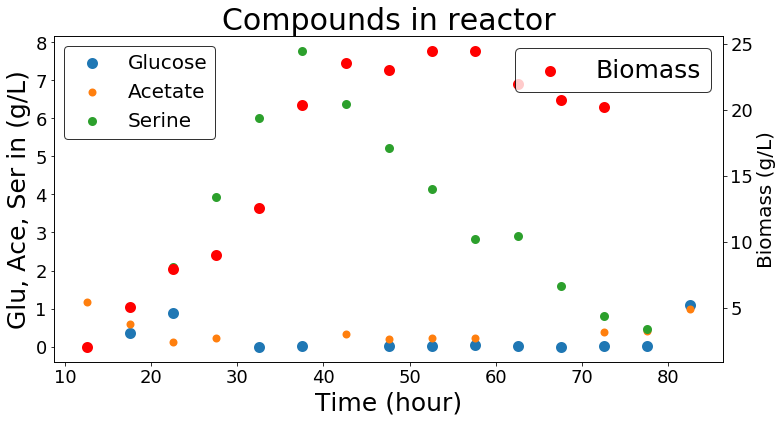

In [21]:
R24_compounds = R24_compounds.replace(['n.a.'],[np.nan])
plot_compounds_micro_fed(R24_compounds, 24)

## Create data frame with amounts from only the oxidative state

In [98]:
# Read and parse compounds from R23
R23 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_fedbatch_ser.xlsx')
R23 = pd.ExcelFile(R23)
R23 = R23.parse('R23_compounds')
R23 = R23.replace(['n.a.'],[np.nan])

# Add time and volume
sample_R23 = pd.read_csv('modified_online_data/sample_volume_and_time_R23.csv')
R23['New Time'] = sample_R23['Time']
R23['Volume (L)'] = sample_R23['Bioreactor 23 - Volume']/1000

# Convert to amounts
R23_amounts = pd.DataFrame()
R23_amounts['Time (hours)'] = R23['New Time'] 
R23_amounts['Glucose (g)'] = R23['Glucose µg/µL']*R23['Volume (L)']
R23_amounts['Biomass (g)'] = R23['Biomass g/L']*R23['Volume (L)']
R23_amounts['Serine (g)'] = R23['Serine g/L']*R23['Volume (L)']

R23_amounts.drop(R23_amounts.tail(10).index,inplace=True)
R23_amounts.to_csv('estimation/fedbatch_amounts/R23_amounts.csv')

In [102]:
# Read and parse compounds from R24
R24 = pd.ExcelFile('analytical_data/modified_analytical_data/compounds_fedbatch_ser.xlsx')
R24 = pd.ExcelFile(R24)
R24 = R24.parse('R24_compounds')
R24 = R24.replace(['n.a.'],[np.nan])

# Add time and volume
sample_R24 = pd.read_csv('modified_online_data/sample_volume_and_time_R24.csv')
R24['New Time'] = sample_R24['Time']
R24['Volume (L)'] = sample_R24['Bioreactor 24 - Volume']/1000

# Convert to amounts
R24_amounts = pd.DataFrame()
R24_amounts['Time (hours)'] = R24['New Time'] 
R24_amounts['Glucose (g)'] = R24['Glucose µg/µL']*R24['Volume (L)']
R24_amounts['Biomass (g)'] = R24['Biomass g/L']*R24['Volume (L)']
R24_amounts['Serine (g)'] = R24['Serine g/L']*R24['Volume (L)']
R24_amounts.drop(R24_amounts.tail(10).index,inplace=True)

# Delete an outlier and save as csv
R24_amounts['Glucose (g)'][2] = 'NaN'
R24_amounts.to_csv('estimation/fedbatch_amounts/R24_amounts.csv')